In [2]:
#Importamos nossa biblioteca!
import pandas as pd

In [5]:
#lendo nossos arquivos exel!
df1 = pd.read_excel('datasets/Aracaju.xlsx')
df2 = pd.read_excel('datasets/Natal.xlsx')
df3 = pd.read_excel('datasets/Fortaleza.xlsx')
df4 = pd.read_excel('datasets/Recife.xlsx')
df5 = pd.read_excel('datasets/Salvador.xlsx')

In [7]:
#Juntandosos arquivos, usando o pandas.concat()
df = pd.concat([df1,df2, df3, df4, df5])

In [11]:
#vamos verificarcomo ficou oarquivo!
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [12]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [13]:
#Verificando os tipos de dados!
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [14]:
#alterando otipo de dado de uma coluna!
df['LojaID'] = df['LojaID'].astype('object')

In [15]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [16]:
#verificando se existe valores nulos!
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

- Substituindo valores nulos:
- Pela media:
df['vendas'].fillna(df['vendas'].mean(), inplace=True) 

- por zero:
df['vendas'].fillna(0,inplace=True)

-Dropando os valores nulos:
df.dropna(inplace=True)

-Dropando linhas com valores nulos com base em apenas 1 coluna:
df.dropna(subset=['vendas],inplace=True)

-Dropando linhas que tenhas todosos valores faltando:
df.dropna(how='all', inplace=True)

In [18]:
#Criandouma coluna de receitas nesse dataset!
#a função .mul() multiplicação!
df['Receitas'] = df['Vendas'].mul(df['Qtde'])

In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [25]:
#Se não tivessemos a Qtde de produtos vendidos bastaria fazer:
df['Receita/Vendas'] = df['Receitas']/df['Vendas']

In [26]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [27]:
#Retornado o maior valor de Receitas
df['Receitas'].max()

3544.0

In [28]:
#nlargest() imprime o top (que é passado como primeiro argumento) em funçãode alguma coluna do dataframe!
df.nlargest(3, 'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [29]:
#nsmallest() imprime os menos!
df.nsmallest(3,'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [30]:
#Podemos agrupar por cidade!
df.groupby('Cidade')['Receitas'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [35]:
#Ordenandoos valores por ordem crescente!
df.sort_values('Receitas', ascending=False).head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


#trabalhando com datas!
>Vamos passar primeiro as datas que estão no formato já de datetimeem int64, isso porque em situações reais (dia-a-dia), não encontramos sempre nesse formato!<

In [36]:
df['Data']= df['Data'].astype('int64')

In [37]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receitas          float64
Receita/Vendas    float64
dtype: object

In [38]:
#Transformando a coluna data em datetime
df['Data']= pd.to_datetime(df['Data'])

In [39]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receitas                 float64
Receita/Vendas           float64
dtype: object

In [41]:
#Agrupando por ano!
df.groupby(df['Data'].dt.year)['Receitas'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [42]:
#criando uma nova coluna com o ano!
df['ano_venda']= df['Data'].dt.year

In [43]:
#pegamosuma pequena amostra para verificar se a alteração funcionou!
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,ano_venda
83,Fortaleza,2019-01-01,3.88,1002,6,23.28,6.0,2019
28,Natal,2019-02-13,705.00,853,2,1410.00,2.0,2019
37,Natal,2018-10-03,726.00,852,2,1452.00,2.0,2018
198,Salvador,2019-01-02,13.65,1037,3,40.95,3.0,2019
130,Recife,2019-03-02,12.36,983,4,49.44,4.0,2019


In [44]:
#fazendo uma coluna com o mes e outra com o dia!
df['dia_venda'], df['mes_venda'] = df['Data'].dt.day, df['Data'].dt.month

In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,ano_venda,dia_venda,mes_venda
199,Salvador,2019-01-02,153.87,1036,3,461.61,3.0,2019,2,1
68,Aracaju,2018-01-01,179.74,1520,2,359.48,2.0,2018,1,1
155,Natal,2019-01-02,237.81,1036,3,713.43,3.0,2019,2,1
48,Aracaju,2018-01-01,35.90,1521,8,287.20,8.0,2018,1,1
116,Natal,2019-01-02,41.78,1034,3,125.34,3.0,2019,2,1


In [46]:
#Retornando a data asi antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [47]:
#Calculando a diferençã de dias!
df['diferenca_dias'] = df['Data']-df['Data'].min()

In [50]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,ano_venda,dia_venda,mes_venda,diferenca_dias
162,Natal,2019-01-02,23.08,1036,2,46.16,2.0,2019,2,1,366 days
168,Natal,2019-01-02,20.22,1036,1,20.22,1.0,2019,2,1,366 days
19,Natal,2019-03-31,282.00,854,2,564.00,2.0,2019,31,3,454 days
57,Natal,2019-02-24,425.00,854,4,1700.00,4.0,2019,24,2,419 days
27,Aracaju,2018-01-01,3.39,1523,4,13.56,4.0,2018,1,1,0 days


In [51]:
#Criando uma coluna de trimestres!
df['trimestre_vendas'] = df['Data'].dt.quarter

In [52]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,ano_venda,dia_venda,mes_venda,diferenca_dias,trimestre_vendas
212,Salvador,2019-01-02,50.73,1037,3,152.19,3.0,2019,2,1,366 days,1
106,Aracaju,2018-01-01,16.32,1520,7,114.24,7.0,2018,1,1,0 days,1
142,Salvador,2019-01-02,7.12,1034,1,7.12,1.0,2019,2,1,366 days,1
28,Recife,2019-01-01,123.69,983,3,371.07,3.0,2019,1,1,365 days,1
91,Natal,2019-01-02,17.74,1035,1,17.74,1.0,2019,2,1,366 days,1


In [53]:
vendas_do_mes_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [56]:
vendas_do_mes_marco_2019.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita/Vendas,ano_venda,dia_venda,mes_venda,diferenca_dias,trimestre_vendas
2,Natal,2019-03-11,308.0,852,3,924.0,3.0,2019,11,3,434 days,1
4,Natal,2019-03-09,699.0,853,3,2097.0,3.0,2019,9,3,432 days,1
5,Natal,2019-03-30,674.0,854,2,1348.0,2.0,2019,30,3,453 days,1
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0,2019,18,3,441 days,1
8,Natal,2019-03-27,667.0,852,4,2668.0,4.0,2019,27,3,450 days,1
18,Natal,2019-03-14,581.0,853,3,1743.0,3.0,2019,14,3,437 days,1
19,Natal,2019-03-31,282.0,854,2,564.0,2.0,2019,31,3,454 days,1
29,Natal,2019-03-09,646.0,854,2,1292.0,2.0,2019,9,3,432 days,1
32,Natal,2019-03-17,244.0,854,2,488.0,2.0,2019,17,3,440 days,1
42,Natal,2019-03-02,775.0,854,2,1550.0,2.0,2019,2,3,425 days,1


#Visualização de Dados!

In [59]:
#O value_counts() conta os valores dentro de uma coluna (no nosso caso!)
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

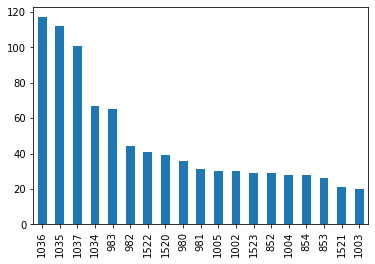

In [61]:
#Plotando um grafico em barras!
df['LojaID'].value_counts(ascending=False).plot.bar();

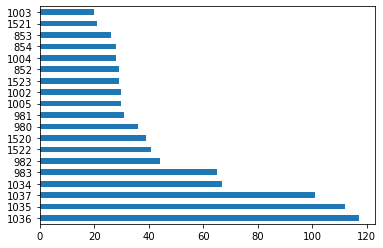

In [66]:
#Plotando um grafico em barras horizontal! 
df['LojaID'].value_counts(ascending=False).plot.barh();

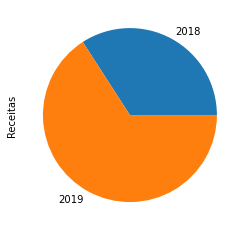

In [68]:
#Plotando um grafico de pie() com base nas receitas e ano!
df.groupby(df['Data'].dt.year)['Receitas'].sum().plot.pie();

In [70]:
#Valor de vendas por cidade!
df['Cidade'].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

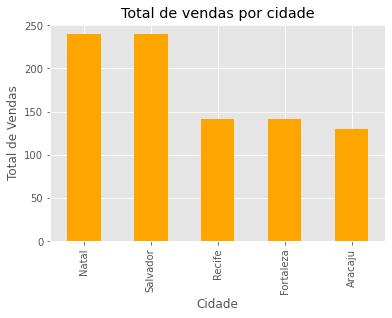

In [85]:
#adicionando titulos e modificando eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title= 'Total de vendas por cidade', color = "Orange")
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas');

In [79]:
#alterando o estilo do grafico!
plt.style.use('ggplot')

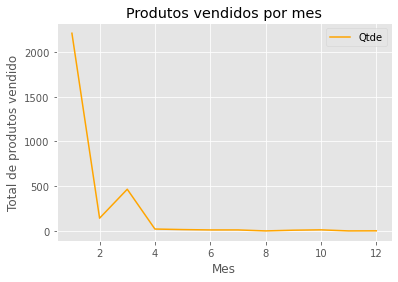

In [87]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Produtos vendidos por mes', color='Orange')
plt.xlabel('Mes')
plt.ylabel('Total de produtos vendido')
plt.legend();

In [88]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [96]:
#selecionando apenas o ano de 2019!
df_19.groupby(df_19['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

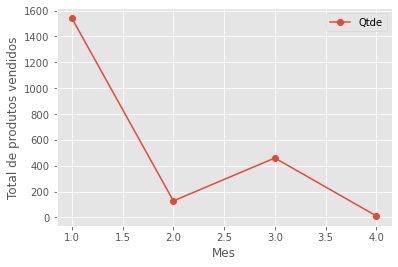

In [95]:
df_19.groupby(df_19['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mes')
plt.ylabel('Total de produtos vendidos')
plt.legend();

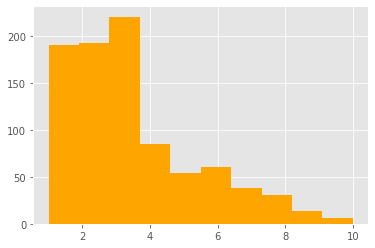

In [99]:
#Histograma da quantidade de produtos vendidos!
plt.hist(df['Qtde'], color='Orange');

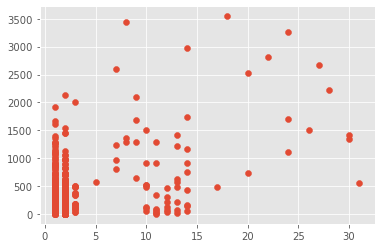

In [102]:
#Faremos agora um grafico de dispersão referente ao dia e receita!
plt.scatter(x=df_19['dia_venda'], y=df_19['Receitas']);

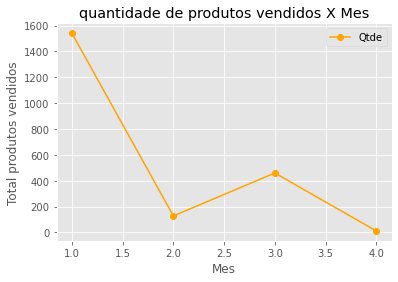

In [105]:
#salvando em png o grafico!
df_19.groupby(df_19['mes_venda'])['Qtde'].sum().plot(marker='o', color='Orange')
plt.title('quantidade de produtos vendidos X Mes')
plt.xlabel('Mes')
plt.ylabel('Total produtos vendidos')
plt.legend()
plt.savefig('grafico_qtdeXmes.png');